In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.integrate import *
from sympy import *
import transformations 
import scipy
matplotlib.rcParams['figure.figsize'] = (18,10)

In [4]:
BN = np.array([[-0.87097, 0.45161, 0.19355],[-0.19355, -0.67742, 0.70968],[0.45161, 0.58065, 0.67742]])

In [5]:
wBN = np.array([[0.1],[0.2],[0.3]])

In [6]:
skew = np.cross(wBN.transpose(),np.eye(3))

In [7]:
np.dot(skew,BN)

array([[-0.148387, -0.319356,  0.07742 ],
       [ 0.306452, -0.077418,  0.009677],
       [-0.154839,  0.158064, -0.032258]])

# Quaternion to DCM (spacecraft-dynamics-kinematic course at coursera)

In [56]:
def QtoDCM(q):
    q0 = q[0]
    q1 = q[1]
    q2 = q[2]
    q3 = q[3]
    return np.array([[q0**2 + q1**2 - q2**2 - q3**2,       2 * (q1 * q2 + q0 * q3),       2 * (q1 * q3 - q0 * q2)],
                     [      2 * (q1 * q2 - q0 * q3), q0**2 - q1**2 + q2**2 - q3**2,       2 * (q2 * q3 + q0 * q1)],
                     [      2 * (q1 * q3 + q0 * q2),       2 * (q2 * q3 - q0 * q1), q0**2 - q1**2 - q2**2 + q3**2]],dtype=np.float64)

In [9]:
q = np.array([0.235702, 0.471405, -0.471405, 0.707107])

In [10]:
QtoDCM(q)

array([[-0.44444488, -0.11111228,  0.88888975],
       [-0.77777842, -0.44444488, -0.44444535],
       [ 0.44444535, -0.88888975,  0.11111039]])

In [11]:
R = np.array([[-0.529403, -0.474115,  0.703525],
              [-0.467056, -0.529403, -0.708231],
              [ 0.708231, -0.703525, 0.0588291]])

In [12]:
def DCMtoQ(R):
    #q  =  np.empty((4, ))
    q0 = 0.5 * np.sqrt(R.trace() + 1)
    q1 = (R[1,2] - R[2,1])/(4 * q0)
    q2 = (R[2,0] - R[0,2])/(4 * q0)
    q3 = (R[0,1] - R[1,0])/(4 * q0)
    return np.array([q0, q1, q2, q3], dtype=np.float64)

In [13]:
DCMtoQ(R)

array([ 0.00240312, -0.48957129,  0.48957129, -0.73435693])

In [14]:
DCMtoQ(R)

array([ 0.00240312, -0.48957129,  0.48957129, -0.73435693])

In [15]:
R = transformations.euler_matrix(np.deg2rad(20), np.deg2rad(10), np.deg2rad(-10), axes='rzyx')
R = R[:3, :3]

In [16]:
DCMtoQ(R)

array([ 0.97600798,  0.10058188, -0.07042819, -0.17980985])

In [17]:
QBN = np.array([0.774597, 0.258199, 0.516398, 0.258199])
QBN = QBN/np.linalg.norm(QBN)
QFB = np.array([0.359211, 0.898027, 0.179605, 0.179605])
QFB = QFB/np.linalg.norm(QFB)

In [18]:
QFN = DCMtoQ(np.dot(QtoDCM(QFB), QtoDCM(QBN)))

In [19]:
QBN = np.array([-0.377964,0.755929,0.377964,0.377964])
QBN = QBN/np.linalg.norm(QBN)
QFN = np.array([0.359211,0.898027,0.179605,0.179605])
QFN = QFN/np.linalg.norm(QFN)

In [20]:
QFB = DCMtoQ( np.dot( QtoDCM( QFB ), np.transpose( QtoDCM( QBN ) ) ) )

In [21]:
QFB

array([  6.78844289e-01,  -6.10959902e-01,  -4.07306309e-01,
         1.98359004e-07])

# Book 3.32 

In [22]:
# 10 = 0.5 * 20
def rot(y, t):
    q0, q1, q2, q3 = y
    dydt =  [np.deg2rad(10) * (                      - np.sin(0.1 * t) * q1 -            0.01 * q2 - np.cos(0.1 * t) * q3),
             np.deg2rad(10) * ( np.sin(0.1 * t) * q0                        + np.cos(0.1 * t) * q2 -            0.01 * q3),
             np.deg2rad(10) * (            0.01 * q0 - np.cos(0.1 * t) * q1                        + np.sin(0.1 * t) * q3),
             np.deg2rad(10) * ( np.cos(0.1 * t) * q0 +            0.01 * q1 - np.sin(0.1 * t) * q2                        )]
    return dydt

In [23]:
y0 = [0.408248, 0., 0.408248, 0.816497]

In [24]:
t = np.linspace(0, 60, 350)

In [25]:
sol = odeint(rot, y0, t)

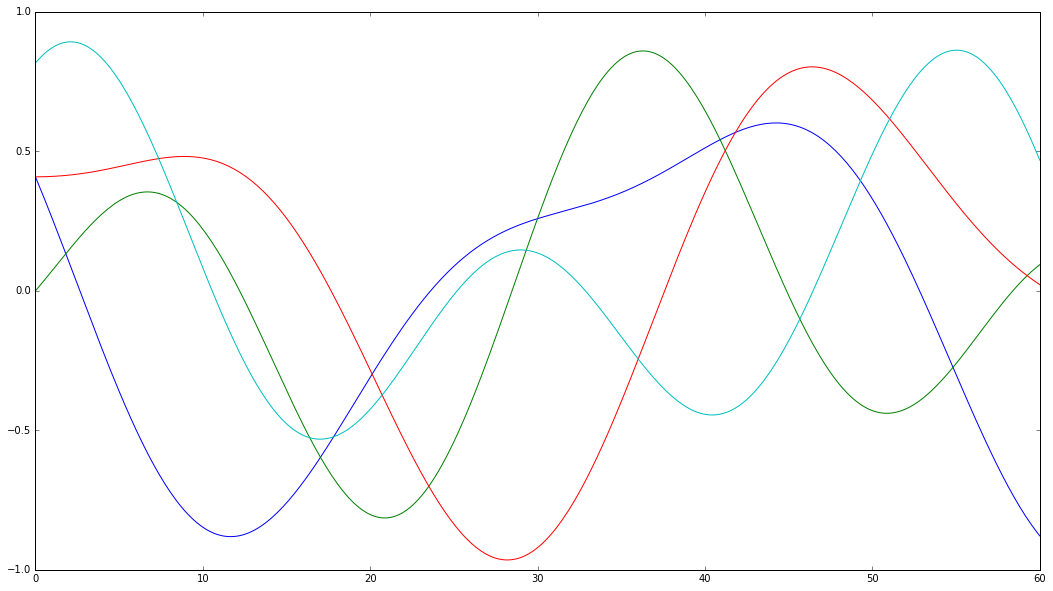

In [26]:
plt.plot(t, sol[:,0], t, sol[:,1], t, sol[:,2], t, sol[:,3])

# Quiz:2.7 

In [27]:
R = transformations.euler_matrix(np.deg2rad(20), np.deg2rad(10), np.deg2rad(-10), axes='rzyx')

In [28]:
transformations.euler_from_matrix(R, axes='rzxz')

(2.7129144573598323, 0.24619691677893205, -2.348540373423724)

In [29]:
q1, q2, q3 = symbols('q1:4')

In [30]:
R1 = rot_axis2(-q1)
R2 = rot_axis3(-q2)
R3 = rot_axis2(-q3)

In [31]:
(R1 * R2 * R3)

Matrix([
[-sin(q1)*sin(q3) + cos(q1)*cos(q2)*cos(q3), -sin(q2)*cos(q1),  sin(q1)*cos(q3) + sin(q3)*cos(q1)*cos(q2)],
[                           sin(q2)*cos(q3),          cos(q2),                            sin(q2)*sin(q3)],
[-sin(q1)*cos(q2)*cos(q3) - sin(q3)*cos(q1),  sin(q1)*sin(q2), -sin(q1)*sin(q3)*cos(q2) + cos(q1)*cos(q3)]])

In [32]:
L, r = symbols('L r')

In [33]:
R1 = Matrix([[cos(q1), -sin(q1), 0, 0],
             [sin(q1),  cos(q1), 0, 0],
             [      0,        0, 1, 0],
             [      0,        0, 0, 1]])

In [34]:
trans = Matrix([[1, 0, 0, L],
                [0, 1, 0, 0],
                [0, 0, 1, r],
                [0, 0, 0, 1]])

In [35]:
q2 = (q1 * L)/r
R2 = Matrix([[1,       0,        0, 0],
             [0, cos(q2), -sin(q2), 0],
             [0, sin(q2),  cos(q2), 0],
             [0,       0,        0, 1]])

In [36]:
R = (R1 * trans * R2)

In [37]:
R[:3, :3].T

Matrix([
[             cos(q1),              sin(q1),           0],
[-sin(q1)*cos(L*q1/r),  cos(q1)*cos(L*q1/r), sin(L*q1/r)],
[ sin(q1)*sin(L*q1/r), -sin(L*q1/r)*cos(q1), cos(L*q1/r)]])

In [38]:
R[:3, :3] * Matrix([[2],[1],[1]])

Matrix([
[sin(q1)*sin(L*q1/r) - sin(q1)*cos(L*q1/r) + 2*cos(q1)],
[2*sin(q1) - sin(L*q1/r)*cos(q1) + cos(q1)*cos(L*q1/r)],
[                            sin(L*q1/r) + cos(L*q1/r)]])

In [39]:
R[:3, :3]

Matrix([
[cos(q1), -sin(q1)*cos(L*q1/r),  sin(q1)*sin(L*q1/r)],
[sin(q1),  cos(q1)*cos(L*q1/r), -sin(L*q1/r)*cos(q1)],
[      0,          sin(L*q1/r),          cos(L*q1/r)]])

In [73]:
# lazy guy's way to write skew function :D
def skew(v):
    return np.cross(np.eye(3), v)

In [41]:
w = skew([1, 2, 3])

In [42]:
np.dot(w,[1, 2, 3])

array([ 0.,  0.,  0.])

# Quiz:2.8 

In [43]:
RNB = transformations.euler_matrix(np.deg2rad(10), np.deg2rad(20), np.deg2rad(30), axes='rzyx')
RNR = transformations.euler_matrix(np.deg2rad(-5),  np.deg2rad(5),   np.deg2rad(5), axes='rzyx')
RRB = np.dot(np.linalg.inv(RNR),RNB)
np.rad2deg(transformations.euler_from_matrix(RRB, axes='rzyx'))

array([ 13.22381821,  16.36834338,  23.61762825])

# Quiz:2.(11,12) 

In [91]:
def CRPtoDCM(q):
    q1 = q[0]
    q2 = q[1]
    q3 = q[2]
    p_norm = np.linalg.norm(q)
    return (1/(1 + p_norm)) * np.array([[1 + q1**2 - q2**2 - q3**2,        2 * (q1 * q2 + q3),        2 * (q1 * q3 - q2)],
                                        [       2 * (q2 * q1 - q3), 1 - q1**2 + q2**2 - q3**2,        2 * (q2 * q3 + q1)],
                                        [       2 * (q3 * q1 + q2),        2 * (q3 * q2 - q1), 1 - q1**2 - q2**2 + q3**2]])

In [45]:
q = [.1, .2, .3]

In [46]:
CRPtoDCM(q)

array([[ 0.64038855,  0.46573712, -0.24742285],
       [-0.40751998,  0.6840514 ,  0.23286856],
       [ 0.33474856, -0.05821714,  0.75682283]])

In [90]:
def DCMtoCRP(R):
    trace = R.trace()
    zeta = trace + 1
    return (1/zeta)* np.array([[R[1,2] - R[2,1]],
                               [R[2,0] - R[0,2]],
                               [R[0,1] - R[1,0]]])

In [48]:
R = np.array([[ 0.333333,  0.871795, -0.358974],
              [-0.666667,  0.487179,  0.564103],
              [ 0.666667, 0.0512821,   0.74359]]).T

In [49]:
DCMtoCRP(R)

array([[-0.2000002 ],
       [-0.40000008],
       [-0.60000031]])

In [50]:
RFN = CRPtoDCM([ .1, .2, .3])
RBN = CRPtoDCM([-.3, .3, .1])

In [51]:
RFB = np.dot(RFN, np.linalg.inv(RBN))

In [52]:
DCMtoCRP(RFB)

array([[ 0.31141592],
       [-0.18873692],
       [ 0.27366854]])

# Quiz: 2.9 

In [53]:
q1, q2, q3 = symbols('q1:4')
R1 = rot_axis2(-q1)
R2 = rot_axis3(-q2)
R3 = rot_axis2(-q3)

In [54]:
(R3).T

Matrix([
[cos(q3), 0, -sin(q3)],
[      0, 1,        0],
[sin(q3), 0,  cos(q3)]])

In [55]:
(R1 * R2 * R3).T

Matrix([
[-sin(q1)*sin(q3) + cos(q1)*cos(q2)*cos(q3), sin(q2)*cos(q3), -sin(q1)*cos(q2)*cos(q3) - sin(q3)*cos(q1)],
[                          -sin(q2)*cos(q1),         cos(q2),                            sin(q1)*sin(q2)],
[ sin(q1)*cos(q3) + sin(q3)*cos(q1)*cos(q2), sin(q2)*sin(q3), -sin(q1)*sin(q3)*cos(q2) + cos(q1)*cos(q3)]])

In [56]:
BN = Matrix([[sin(q2) * cos(q3), -sin(q3), 0],
             [          cos(q2),        0, 1],
             [sin(q2) * sin(q3),  cos(q3), 0]])

In [57]:
BN_adj =  Matrix([[-cos(q3),  sin(q2) * sin(q3), cos(q2) * cos(q3)],
                  [       0,                  0,          -sin(q2)],
                  [-sin(q3), -sin(q2) * cos(q3), sin(q3) * cos(q2)]]).T

BN_det = -sin(q2)
NB = (1/BN_det) * BN_adj 

In [58]:
NB

Matrix([
[         cos(q3)/sin(q2), 0,          sin(q3)/sin(q2)],
[                -sin(q3), 0,                  cos(q3)],
[-cos(q2)*cos(q3)/sin(q2), 1, -sin(q3)*cos(q2)/sin(q2)]])

In [59]:
# 10 = 0.5 * 20
def rot(y, t):
    q1, q2, q3 = y
    dydt =  [np.deg2rad(20) * (                  (np.sin(q3) / np.cos(q2)) * 0.01  +      (np.cos(q3)/np.cos(q2)) * np.cos(0.1 * t)),
             np.deg2rad(20) * (                               (np.cos(q3)) * 0.01  +                (-np.sin(q3)) * np.cos(0.1 * t)),
             np.deg2rad(20) * (np.sin(0.1 * t) + (np.sin(q3) * np.tan(q2)) * 0.01  +    (np.cos(q3) * np.tan(q2)) * np.cos(0.1 * t))]
    return dydt

In [60]:
y0 = np.deg2rad([40, 30, 80])
#y0 = [40, 30, 80]

In [61]:
t = np.linspace(0, 60, 100)

In [62]:
sol = odeint(rot, y0, t)

/usr/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


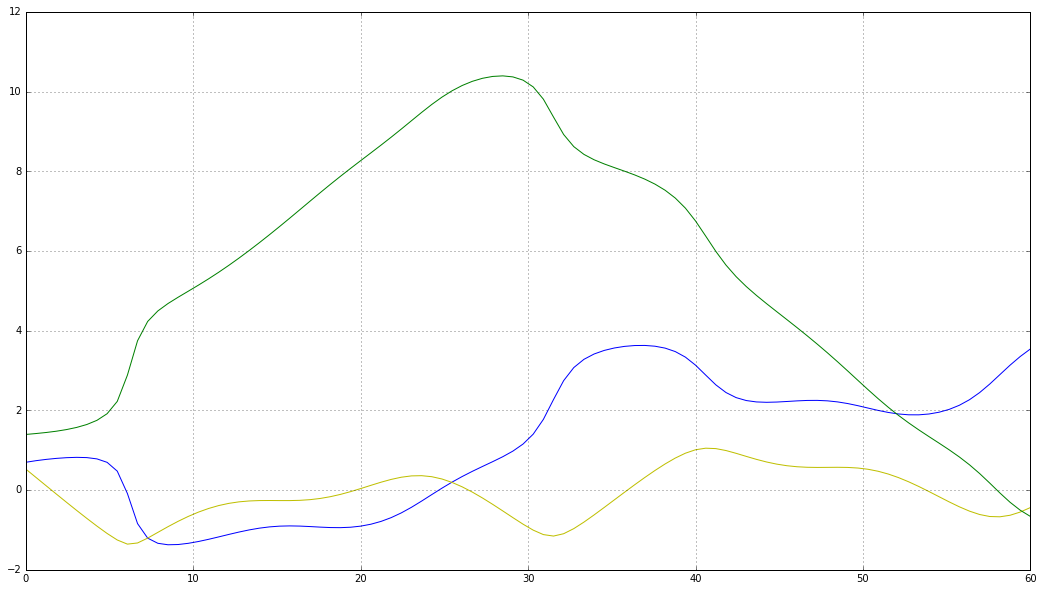

In [63]:
plt.plot(t, sol[:,0], 'b', t, sol[:,1], 'y', t, sol[:,2], 'g')
plt.grid(true)
plt.legend(loc='best')

# Quiz: 2.13 

In [64]:
# 10 = 0.5 * 20
def rot(y, t):
    q1, q2, q3 = y
    dydt =  [np.deg2rad(3/2) * (   (1 + q1**2) * np.sin(0.1 * t) + (q1 * q2 - q3) * 0.01  + (q1 * q3 + q2) * np.cos(0.1 * t)),
             np.deg2rad(3/2) * ((q2 * q1 + q3) * np.sin(0.1 * t) +    (1 + q2**2) * 0.01  + (q2 * q3 - q1) * np.cos(0.1 * t)),
             np.deg2rad(3/2) * ((q3 * q1 - q2) * np.sin(0.1 * t) + (q3 * q2 + q1) * 0.01  +    (1 + q3**2) * np.cos(0.1 * t))]
    return dydt

In [65]:
y0 = [0.4, 0.2, -0.1]

In [66]:
t = np.linspace(0, 60, 300)

In [67]:
sol = odeint(rot, y0, t)

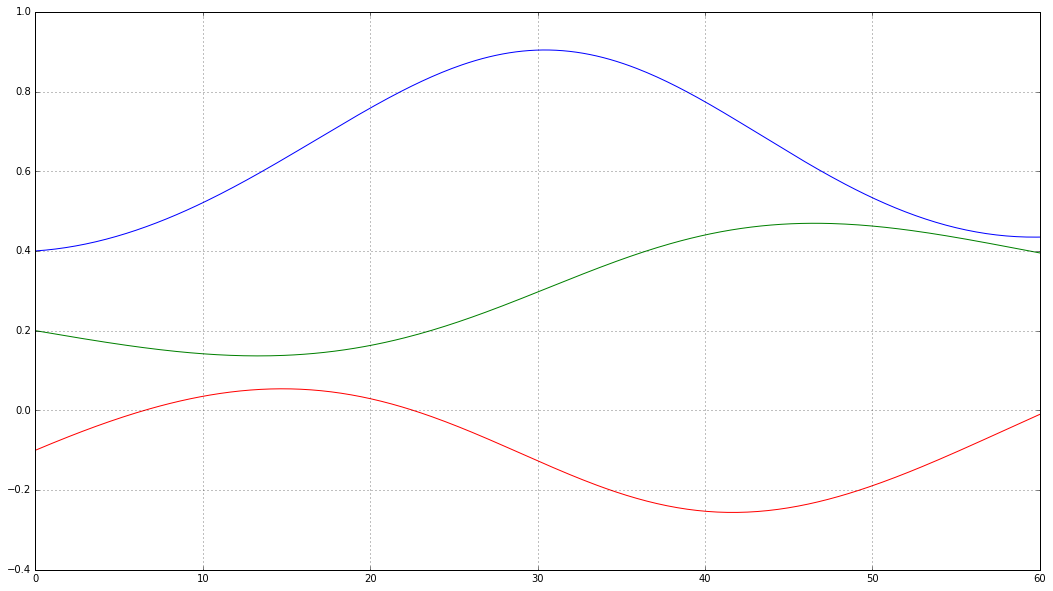

In [68]:
plt.plot(t, sol[:,0], t, sol[:,1], t, sol[:,2])
plt.grid(true)

In [69]:
# linearizing sin, cos, tan
t = np.arange(-.57, .57, 0.01)

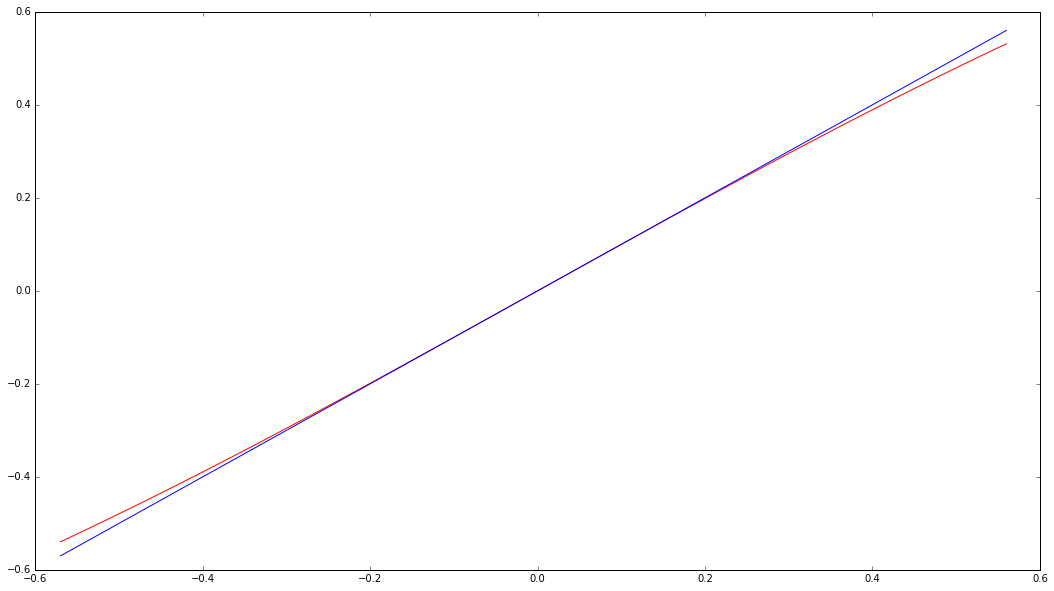

In [70]:
plt.plot(t, np.sin(t), 'r', t, t, 'b')

In [71]:
np.rad2deg(np.sin(0.57) - 0.57)

-1.7399554400025274

In [72]:
np.rad2deg(0.57)

32.658594322456921

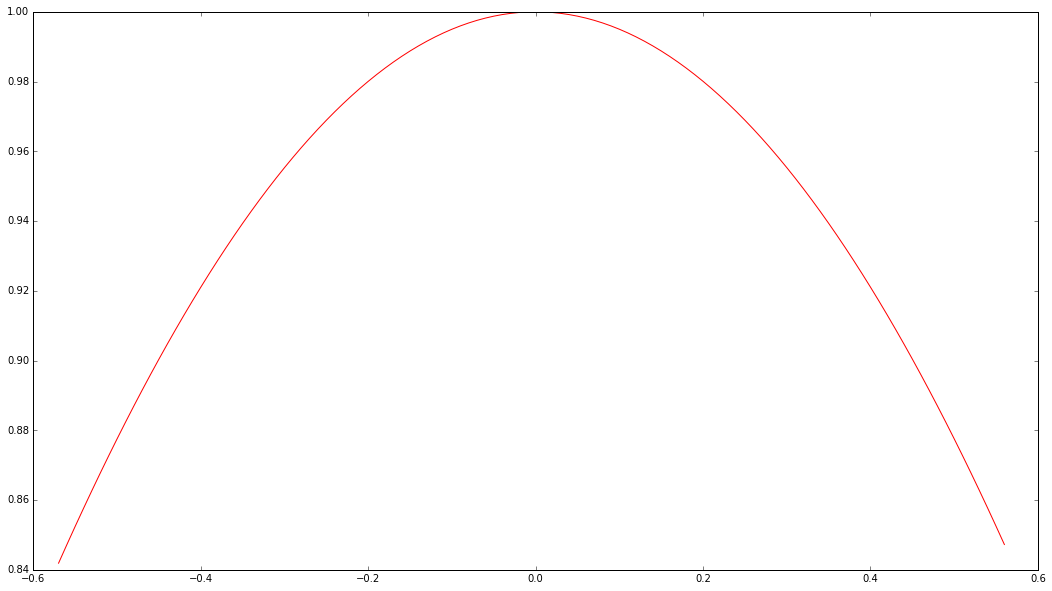

In [73]:
t = np.arange(-.57, .57, 0.01)
plt.plot(t, np.cos(t), 'r', t, np.ones_like(t), 'b')

# Quiz 3.17

In [74]:
def toShadow(v):
    v1 = v[0]
    v2 = v[1]
    v3 = v[2]
    v_norm = np.linalg.norm(v)
    return np.array([v1, v2, v3]) * (-1/v_norm**2)

In [75]:
toShadow([0.1, 0.2, 0.3])

array([-0.71428571, -1.42857143, -2.14285714])

# Quiz 3.18

In [76]:
def MRPtoDCM(v):
    v_norm = np.linalg.norm(v)
    return np.eye(3) + (1/(1 + v_norm**2))**2 * (8 * skew(v).dot(skew(v)) - 4 * (1 - v_norm**2) * skew(v))

In [77]:
MRPtoDCM([0.1, 0.2, 0.3])

array([[ 0.19975377,  0.91720529, -0.34472145],
       [-0.67097568,  0.38442598,  0.63404124],
       [ 0.71406587,  0.10464758,  0.69221299]])

In [78]:
def VectorFromSkew(w):
    return np.array([w[2, 1], w[0, 2], w[1, 0]])
def DCMtoMRP(R):
    zeta = np.sqrt(R.trace() + 1)
    return VectorFromSkew((R.T - R) / (zeta * (zeta + 2)))

In [79]:
R = np.array([[ 0.763314, -0.568047, -0.307692],
              [0.0946746, -0.372781,  0.923077],
              [-0.639053, -0.733728, -0.230769]])

In [80]:
# R = np.array([[ 0.19975377,  0.91720529, -0.34472145],
#               [-0.67097568,  0.38442598,  0.63404124],
#               [ 0.71406587,  0.10464758,  0.69221299]])

In [81]:
np.round(DCMtoMRP(R), 2)

array([ 0.5, -0.1, -0.2])

# Quiz 3.19 

In [82]:
RBN = MRPtoDCM([0.1, 0.2, 0.3])
RRB = MRPtoDCM([-.1, 0.3, 0.1])

In [83]:
RRN = np.dot(RRB, RBN)

In [84]:
DCMtoMRP(RRN)

array([-0.16015899,  0.41617957,  0.52957681])

In [85]:
RBN = MRPtoDCM([0.1, 0.2, 0.3])
RRN = MRPtoDCM([0.5, 0.3, 0.1])

In [86]:
RBR = np.dot(RBN, RRN.T)

In [87]:
DCMtoMRP(RBR)

array([-0.37998495,  0.11437171, -0.02332581])

# Quiz 3.20 

In [88]:
# 10 = 0.5 * 20
def rot(y, t):
    q1, q2, q3 = y
    q_norm = np.linalg.norm(y)
    if q_norm > 1.0:
        q1, q2, q3 = -q1 / q_norm**2, -q2 / q_norm**2, -q3 / q_norm**2
    dydt =  [np.deg2rad(5) * ((1 - q_norm**2 + 2 * q1**2) * np.sin(0.1 * t) +          2 * (q1 * q2 - q3) * 0.01  +          2 * (q1 * q3 + q2) * np.cos(0.1 * t)),
             np.deg2rad(5) * (       (2 * (q2 * q1 + q3)) * np.sin(0.1 * t) + (1 - q_norm**2 + 2 * q2**2) * 0.01  +          2 * (q2 * q3 - q1) * np.cos(0.1 * t)),
             np.deg2rad(5) * (       (2 * (q3 * q1 - q2)) * np.sin(0.1 * t) +          2 * (q3 * q2 + q1) * 0.01  + (1 - q_norm**2 + 2 * q3**2) * np.cos(0.1 * t))]
    return dydt

In [89]:
y0 = [0.4, 0.2, -0.1]

In [90]:
t = np.linspace(0, 60, 300)

In [91]:
sol = odeint(rot, y0, t)

In [93]:
q1, q2, q3 = y0

q_norm = np.linalg.norm(y0)


In [94]:
t0 = 0
t1 = 60
dt = 0.2
tspan = np.arange(t0, t1, dt)

In [95]:
y0 = np.array([[0.4],[0.2],[-0.1]])
y = y0.copy()
ys = y0.copy()
for t in tspan:
    q1, q2, q3 = y[0, 0], y[1, 0], y[2, 0]
    q_norm = np.linalg.norm(y)
    if q_norm > 1:
        y = -y / q_norm
    dydt =  np.array([[np.deg2rad(5) * ((1 - q_norm**2 + 2 * q1**2) * np.sin(0.1 * t) +          2 * (q1 * q2 - q3) * 0.01  +          2 * (q1 * q3 + q2) * np.cos(0.1 * t))],
                      [np.deg2rad(5) * (       (2 * (q2 * q1 + q3)) * np.sin(0.1 * t) + (1 - q_norm**2 + 2 * q2**2) * 0.01  +          2 * (q2 * q3 - q1) * np.cos(0.1 * t))],
                      [np.deg2rad(5) * (       (2 * (q3 * q1 - q2)) * np.sin(0.1 * t) +          2 * (q3 * q2 + q1) * 0.01  + (1 - q_norm**2 + 2 * q3**2) * np.cos(0.1 * t))]])
    y += dydt * dt
    ys = np.hstack((ys, y))

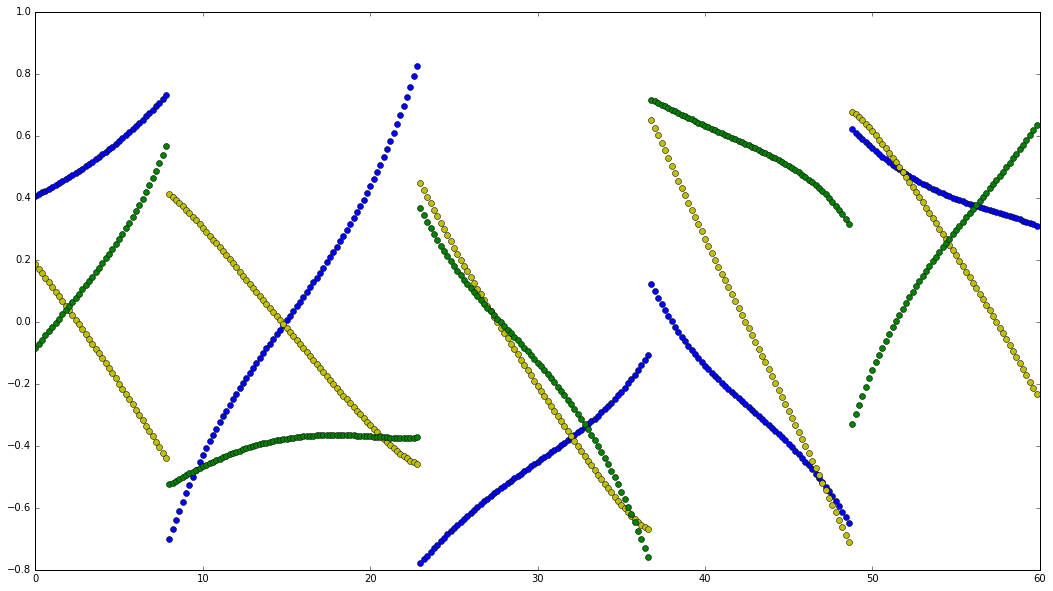

In [96]:
plt.plot(tspan, ys[0, 1:], 'ob', tspan, ys[1, 1:], 'oy', tspan, ys[2, 1:], 'og')

# TRIAD METHOD 

In [125]:
Bv1 = np.array([[ 0.8273,  0.5541, -0.0920]], dtype=np.float64) ## more accurate
Bv2 = np.array([[-0.8285,  0.5522, -0.0955]], dtype=np.float64)
Nv1 = np.array([[-0.1517, -0.9669,  0.2050]], dtype=np.float64)
Nv2 = np.array([[-0.8393,  0.4494, -0.3044]], dtype=np.float64)

In [126]:
def TRIADframe(s, m):
    # assuem the first vector is more accurate
    t1 = s.copy()
    sxm = np.cross(s, m)
    t2 = sxm / np.linalg.norm(sxm)
    t3 = np.cross(t1, t2)
    return np.hstack((t1.T, t2.T, t3.T))

In [127]:
BT = TRIADframe(Bv1, Bv2)
NT = TRIADframe(Nv1, Nv2)

In [128]:
BN = np.dot(BT, np.linalg.inv(NT))

In [180]:
def DCMtoPRV(R):
    theta = np.arccos(0.5 * (R.trace() - 1))
    e     = (1 / (2 * np.sin(theta))) * np.array([[R[1, 2] - R[2, 1]], [R[2, 0] - R[0, 2]], [R[0, 1] - R[1, 0]]], dtype=np.float64)
    return theta, e

In [181]:
BNe = np.array([[0.969846,-0.200706,-0.138258],
                [ 0.17101,  0.96461,-0.200706],
                [0.173648,  0.17101, 0.969846]])
BN  = np.array([[0.963592,-0.223042,-0.147454],
                [0.187303, 0.956645,-0.223042],
                [0.190809, 0.187303, 0.963592]])

In [182]:
theta1 = DCMtoPRV(BNe)[0]
theta2 = DCMtoPRV(BN)[0]

In [183]:
np.rad2deg(theta2 - theta1)

1.8284522666836571

# Devenport's q-Method 

In [2]:
Bv1 = np.array([[ 0.8273,  0.5541, -0.0920]], dtype=np.float64) ## more accurate
Bv2 = np.array([[-0.8285,  0.5522, -0.0955]], dtype=np.float64)
Nv1 = np.array([[-0.1517, -0.9669,  0.2050]], dtype=np.float64)
Nv2 = np.array([[-0.8393,  0.4494, -0.3044]], dtype=np.float64)

In [3]:
def Bmatrix(Bv, Nv, w):
    B = np.zeros((3, 3))
    for i in range(len(Bv)):
        B += w[i] * np.outer(Bv[i], Nv[i])
    return B

In [31]:
B = Bmatrix([Bv1, Bv2], [Nv1, Nv2], [1, 1])
def Kmatrix(B):
    K = np.zeros((4, 4))
    sigma = B.trace()
    Z = np.array([B[1, 2] - B[2, 1],
                  B[2, 0] - B[0, 2],
                  B[0, 1] - B[1, 0]])
    S = B + B.T
    K[0, 0]   = sigma
    K[0, 1:]  = Z.T
    K[1:, 0]  = Z
    K[1:, 1:] = (S - sigma * np.eye(3))[:, :] 
    return K
def Kcoeff(B):
    sigma = B.trace()
    Z = np.array([B[1, 2] - B[2, 1],
                  B[2, 0] - B[0, 2],
                  B[0, 1] - B[1, 0]])
    S = B + B.T
    return sigma, Z, S

In [208]:
np.linalg.eig(Kmatrix(B))[1][:, 3]

array([ 0.02640542, -0.84099401,  0.50198046, -0.20011858])

In [225]:
eigval, eigvec = np.linalg.eig(Kmatrix(B))
index = np.argmax(eigval)
Q = eigvec[:, index]
QtoDCM(Q)

array([[ 0.41593634, -0.85489355,  0.31008704],
       [-0.83375669, -0.49463674, -0.24532484],
       [ 0.36310707, -0.15649763, -0.91851061]])

# QUEST 

In [26]:
s = symbols('s')
K = Matrix(Kmatrix(B))
f = det(K - s * eye(4))
dfds = diff(f, s)
lam = 2.

In [27]:
for i in range(10):
    lam -= (f / dfds).evalf(subs={s:lam})

In [29]:
lam = np.float64(lam)

In [32]:
sigma, Z, S = Kcoeff(B)

In [34]:
q = np.dot(np.linalg.inv((sigma + lam) * np.eye(3) - S), Z)

array([-31.84929092,  19.01050604,  -7.5786924 ])

In [55]:
beta = (1 / np.sqrt(1 + np.dot(q, q))) 
* np.concatenate((np.ones((1,)), q))

In [57]:
QtoDCM(beta)

array([[ 0.41593634, -0.85489355,  0.31008704],
       [-0.83375669, -0.49463674, -0.24532484],
       [ 0.36310707, -0.15649763, -0.91851061]])

# OLAE 

In [59]:
def _s(Bv, Nv):
    return Bv + Nv
def _d(Bv, Nv):
    return Bv - Nv

In [86]:
s1 = skew(_s(Bv1, Nv1))
d1 = _d(Bv1, Nv1)
s2 = skew(_s(Bv2, Nv2))
d2 = _d(Bv2, Nv2)
s = np.vstack((s1, s2))
d = np.vstack((d1, d2)).reshape((6, 1))

In [87]:
W = np.eye(6)

In [110]:
q = np.linalg.multi_dot((np.linalg.inv(np.linalg.multi_dot((s.T, W, s))), s.T, W, d)).reshape((3,))

In [111]:
beta = (1 / np.sqrt(1 + np.dot(q, q))) * np.concatenate((np.ones((1,)), q))

In [114]:
QtoDCM(beta)

array([[ 0.41620817, -0.85478402,  0.31002425],
       [-0.83364731, -0.49486317, -0.24523989],
       [ 0.36304672, -0.15638004, -0.9185545 ]])

In [117]:
def CRPtoQ(v):
    beta = (1 / np.sqrt(1 + np.dot(v, v))) * np.concatenate((np.ones((1,)), v), axis=0)
    return beta

In [122]:
def CRPtoDCM(q):
    q_norm2 = np.dot(q, q)
    R = (1 / (1 + q_norm2)) * ((1 - q_norm2) * np.eye(3) + 2 * np.outer(q, q) - 2 * skew(q))
    return R